# Mathematische Modelle zur Beschreibung von Daten

Wir haben letzte Woche einen Datensatz von handgeschriebenen Ziffern eingelesen. Diese waren im csv-Format gespeichert. Wir haben die handgeschriebenen Ziffern visualisiert und eine Reihe an Statistiken auf den Daten berechnet. 

In einem anderen Notebook, haben wir uns Wahrscheinlichkeitsverteilungen angeschaut. Wir haben zu den Wahrscheinlichkeitsverteilungen Zufallszahlen generiert und diese zusammen mit den Wahrscheinlichkeitsdichtefunktionen visualisiert.

Anhand eines weiteren Datensatzes (https://datahub.io/core/global-temp#data) wollen wir nun die zwei Welten zusammenbringen und ein neues Datenformat (JSON) kennenlernen. Wir wollen diese Daten einlesen und anhand von mathematischen Modellfunktionen beschreiben. Bei dem Datensatz handelt es sich um die monatlichen Temperaturmittelwerte für die gesammte Erde.

---

In [1]:
import numpy as np
import pandas as pd
import scipy, scipy.stats
import matplotlib.pyplot as plt

In [2]:
f = open("data/temperature/annual_json.json", "r") # öffnet die Datei
file_content = f.read(500) # liest die ersten 100 Zeichen der Datei

In [3]:
file_content

'[{"Mean": 0.9363, "Source": "GCAG", "Year": 2016},{"Mean": 0.99, "Source": "GISTEMP", "Year": 2016},{"Mean": 0.8998, "Source": "GCAG", "Year": 2015},{"Mean": 0.87, "Source": "GISTEMP", "Year": 2015},{"Mean": 0.7408, "Source": "GCAG", "Year": 2014},{"Mean": 0.74, "Source": "GISTEMP", "Year": 2014},{"Mean": 0.6679, "Source": "GCAG", "Year": 2013},{"Mean": 0.65, "Source": "GISTEMP", "Year": 2013},{"Mean": 0.624, "Source": "GCAG", "Year": 2012},{"Mean": 0.63, "Source": "GISTEMP", "Year": 2012},{"Mea'

Wie wir sehen, handelt es sich immernoch um eine Textdatei. Diese ist jedoch in einem grundsätzlich anderen Format aufgebaut. Jedoch gibt es auch hier bereits fertige Interpreter in pandas:

In [4]:
data = pd.read_json("data/temperature/annual_json.json") 

In [5]:
data.head()

,Mean,Source,Year
0,0.9363,GCAG,2016
1,0.9900,GISTEMP,2016
2,0.8998,GCAG,2015
3,0.8700,GISTEMP,2015
4,0.7408,GCAG,2014


Zunächst will ich die Daten etwas umformatieren, so dass das Datum zum index des Dataframes wird und die verschiedenen Quellen (Source) als Spalten dargestellt werden. Dazu nutze ich die Pivot-Funktion von pandas:

In [7]:
pivot_df = data.pivot(index='Year', columns='Source', values='Mean')

In [8]:
pivot_df.head()

Source,GCAG,GISTEMP
Year,,
1880,-0.1148,-0.20
1881,-0.0628,-0.12
1882,-0.0648,-0.10
1883,-0.1424,-0.21
1884,-0.2009,-0.28


Wie ich aus der Beschreibung der Daten weiß, handelt es sich um einen zeitlichen Verlauf der Temperaturmittelwerte. Diesen will ich zunächst einmal visualisieren um ein gefühl dafür zu bekommen.

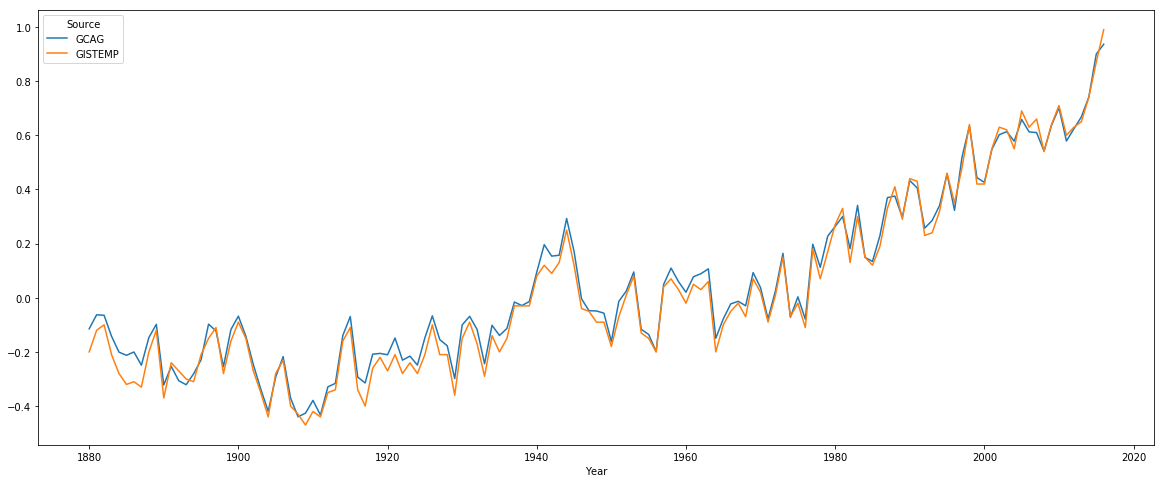

In [9]:
pivot_df.plot(figsize=(20, 8),);

Zuletzt bei den Verteilungen haben wir selbst generierte Daten in Zusammenhang mit ihren Wahrscheinlichkeitsdichtefunktionien gebracht. Nun versuche ich dasselbe mit den Temperaturdaten zu denen ich die Verteilung nicht kenne. Dazu visualisiere ich erstmal die Wertebereiche für 'GCAG' und 'GISTEMP' mit Hilfe eines normierten Histogramms.

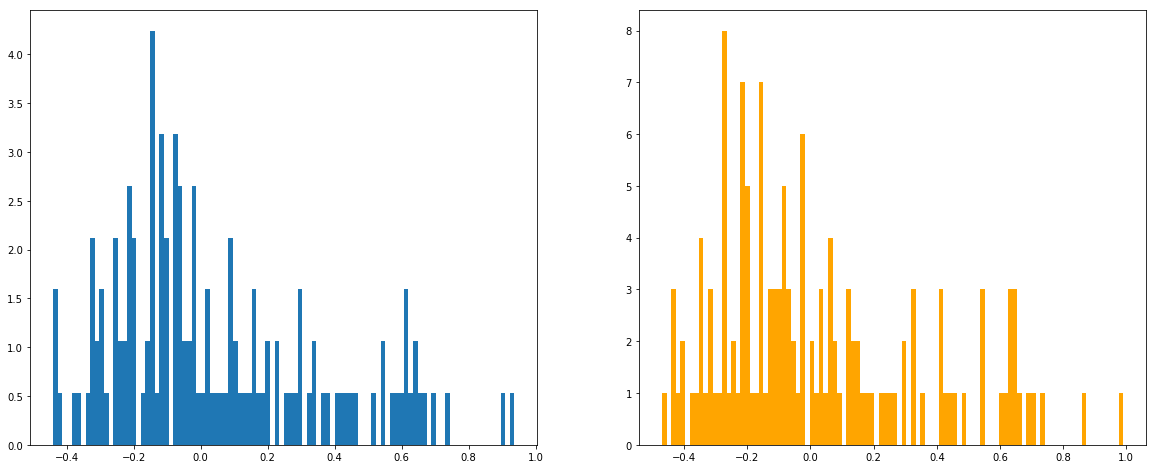

In [10]:
plt.figure(1, figsize=(20, 8))

plt.subplot(1,2, 1 )
plt.hist(pivot_df['GCAG'], bins=100, density=True)

plt.subplot(1,2, 2 )
plt.hist(pivot_df['GISTEMP'], bins=100, color='orange')

plt.show()

Und lasse mir ein paar Statistiken dazu ausgeben

In [11]:
pivot_df.describe()

Source,GCAG,GISTEMP
count,137.000000,137.000000
mean,0.048796,0.024380
std,0.313582,0.327119
min,-0.439600,-0.470000
25%,-0.177400,-0.210000
50%,-0.047700,-0.070000
75%,0.229600,0.190000
max,0.936300,0.990000


Auch wenn die Daten nicht ganz normalverteilt aussehen, will ich diese Wahrscheinlichkeitsdichtefunktion über die Werte plotten. Dazu nehme ich die Mittelwert und Standardabweichung aus dem describe() Ergebnis.

In [12]:
loc_gcag = 0.048797
scale_gcag = 0.326230
lower = scipy.stats.norm.ppf(0.01,loc_gcag,scale_gcag)
upper = scipy.stats.norm.ppf(0.99,loc_gcag,scale_gcag)
x_gcag = scipy.linspace(lower,upper,100)

y_gcag = scipy.stats.norm.pdf(x_gcag,loc_gcag,scale_gcag)

In [13]:
loc_gistemp = 0.024380
scale_gistemp = 0.343709
lower = scipy.stats.norm.ppf(0.01,loc_gistemp,scale_gistemp)
upper = scipy.stats.norm.ppf(0.99,loc_gistemp,scale_gistemp)
x_gistemp = scipy.linspace(lower,upper,100)

y_gistemp = scipy.stats.norm.pdf(x_gistemp,loc_gistemp,scale_gistemp)

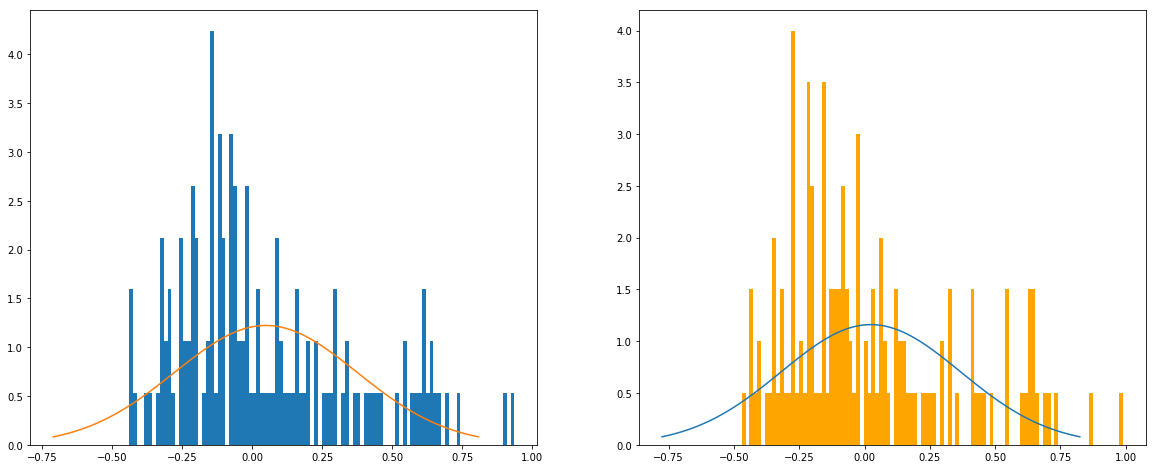

In [14]:
plt.figure(1, figsize=(20, 8))

plt.subplot(1,2, 1 )
plt.hist(pivot_df['GCAG'], bins=100, density=True)
plt.plot(x_gcag,y_gcag)

plt.subplot(1,2, 2 )
plt.hist(pivot_df['GISTEMP'], bins=100, density=True, color='orange')
plt.plot(x_gistemp,y_gistemp)

plt.show()

Wie unschwer zu erkennen ist, passt die Verteilung nicht genau auf die Daten und ist somit keine besonders gute Beschreibung der Daten.

** AUFGABE: ** Finde eine bessere Möglichkeit die Daten zu beschreiben

---